In [2]:
from sklearn import datasets,metrics,linear_model,cross_validation,preprocessing,grid_search
import pandas as pd
# библиотека seaborn для визуализации
import seaborn as sns 
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загружаем toy dataset

In [4]:
boston=datasets.load_boston()

In [5]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [6]:
boston.DESCR

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [7]:
b_data=pd.DataFrame({'crim':boston.data[:,0], 'zn':boston.data[:,1],'indus':boston.data[:,2],'chas':boston.data[:,3],
                    'nox':boston.data[:,4], 'rm':boston.data[:,5],'age':boston.data[:,6], 'dis':boston.data[:,7],
                    'rad':boston.data[:,8],'tax':boston.data[:,9],'ptratio':boston.data[:,10],'b':boston.data[:,11],
                    'lstat':boston.data[:,12]})
Y=pd.DataFrame({'target':boston.target})

In [8]:
b_data.head()

,age,b,chas,crim,dis,indus,lstat,nox,ptratio,rad,rm,tax,zn
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,396.90,0.0,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,392.83,0.0,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,394.63,0.0,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,396.90,0.0,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0


In [9]:
b_data.isnull().any()

age        False
b          False
chas       False
crim       False
dis        False
indus      False
lstat      False
nox        False
ptratio    False
rad        False
rm         False
tax        False
zn         False
dtype: bool

In [10]:
Y.isnull().any()

target    False
dtype: bool

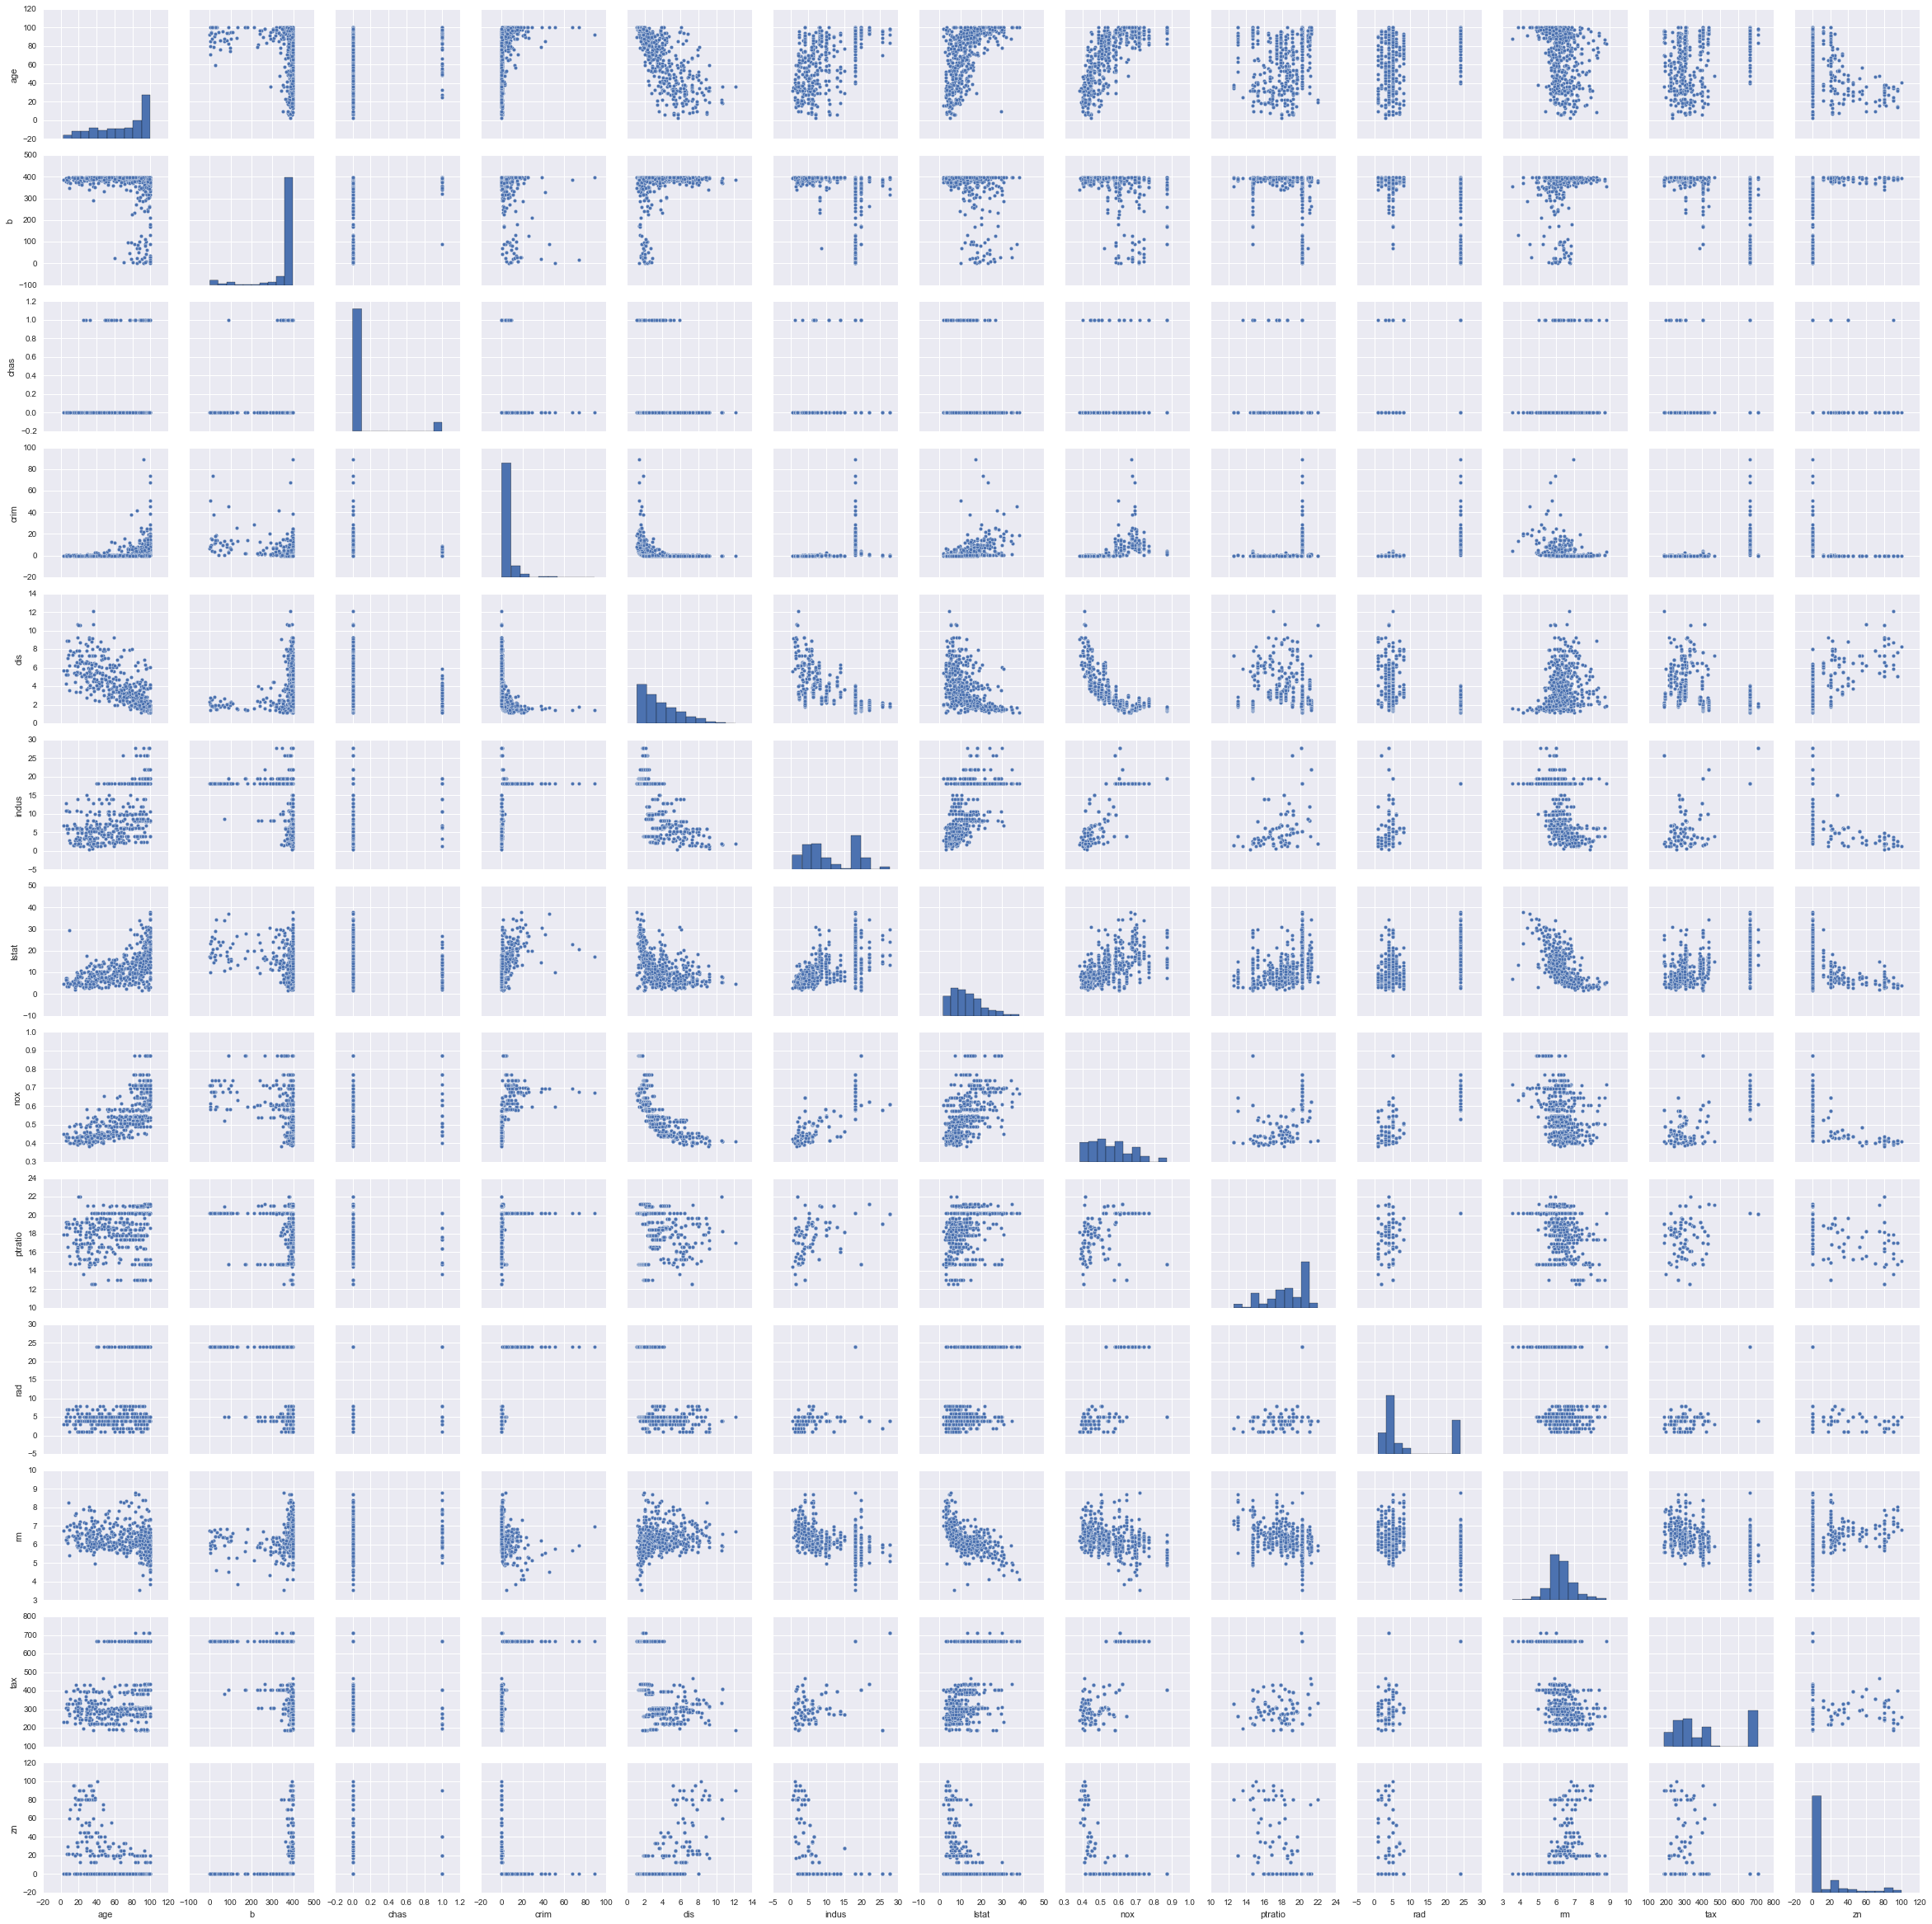

In [11]:
#гистограммы+графики зависимости признаков друг от друга
sns.pairplot(b_data) 

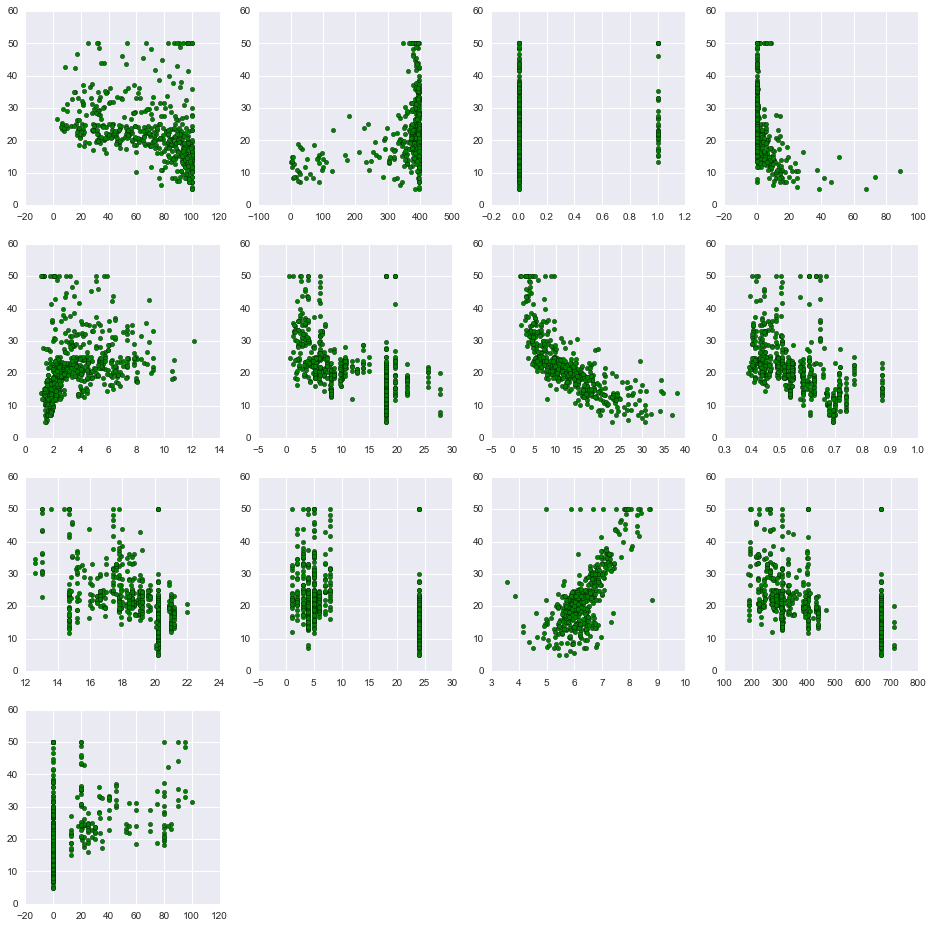

In [12]:
# графики зависимости y от признаков
fig=plt.figure(figsize=(16, 16))
     
for idx,feature in enumerate(b_data.columns):
    ax = fig.add_subplot(4,4, idx+1)
    ax.scatter(b_data[feature], Y, c='green')

## Разделим выборку на обучающую и тестовую части

In [13]:
train_data,test_data,train_y,test_y=cross_validation.train_test_split(b_data,Y,test_size=0.3, random_state=0)

## Стандартизируем признаки

In [14]:
binary_cols=['chas']
numeric_cols=list(set(b_data.columns.values.tolist()) - set(binary_cols))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data=scaler.fit_transform(train_data[numeric_cols], train_y)
scaled_test_data=scaler.transform(test_data[numeric_cols])

## Обучаем модель регрессии с параметрами по умолчанию

In [24]:
regressor=linear_model.SGDRegressor()
regressor.fit(scaled_train_data,train_y)
prediction=regressor.predict(scaled_test_data)
print metrics.mean_absolute_error(test_y,prediction)
print list(map(lambda x : round(x, 2), regressor.coef_))

3.64767848041
[-0.8, 0.39, 0.75, -3.1, -0.45, -0.74, 0.53, -0.59, 3.38, -0.31, -2.18, -1.64]


C:\Users\user\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Определим, какие параметры можно настраивать

In [17]:
regressor.get_params().keys()

['warm_start',
 'loss',
 'eta0',
 'verbose',
 'shuffle',
 'fit_intercept',
 'l1_ratio',
 'average',
 'n_iter',
 'penalty',
 'power_t',
 'random_state',
 'epsilon',
 'alpha',
 'learning_rate']

## Создаём сетку параметров

In [18]:
param_grid = {
    'loss' : ['huber', 'epsilon_insensitive', 'squared_loss' ],
    'n_iter' : [3, 5, 10, 50,100,500], 
    'penalty' : ['l1', 'l2', 'none'],
    'alpha' : [9, 0.0001, 0.01, 1, 5],
                }

## Поиск лучших параметров по сетке

In [19]:
grid_cv=grid_search.GridSearchCV(regressor,param_grid,scoring = 'mean_absolute_error', cv = 5)

In [20]:
grid_cv.fit(scaled_train_data,np.ravel(train_y))

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2', 'none'], 'loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 'alpha': [9, 0.0001, 0.01, 1, 5], 'n_iter': [3, 5, 10, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

In [23]:
print grid_cv.best_score_
print grid_cv.best_params_

-3.04737631463
{'penalty': 'none', 'alpha': 9, 'n_iter': 500, 'loss': 'epsilon_insensitive'}


Проверка модели с выбранными параметрами на отложенной выборке

In [22]:
print metrics.mean_absolute_error(test_y,grid_cv.best_estimator_.predict(scaled_test_data))

3.55227485762
